In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'rid_symbol_exchange_map.csv']


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

from wordcloud import WordCloud, STOPWORDS
import time
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn import preprocessing

In [84]:
data = pd.read_csv('../input/train.csv')

In [85]:
df.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [86]:
data['TripType'] = data['TripType'].astype('category')
data['VisitNumber'] = data['VisitNumber'].astype('category') 
data['Weekday'] = data['Weekday'].astype('category')
data['Upc'] = data['Upc'].astype('category')
data['ScanCount'] = data['ScanCount'].astype('category')
data['DepartmentDescription'] = data['DepartmentDescription'].astype('str')
data['FinelineNumber'] = data['FinelineNumber'].astype('category')

In [87]:
data.dtypes

TripType                 category
VisitNumber              category
Weekday                  category
Upc                      category
ScanCount                category
DepartmentDescription      object
FinelineNumber           category
dtype: object

In [88]:
data.describe()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
count,647054,647054,647054,642925.0,647054,647054,642925.0
unique,38,95674,7,97714.0,39,69,5195.0
top,40,72439,Sunday,4011.0,1,GROCERY DRY GOODS,5501.0
freq,174164,209,133975,7657.0,561489,70402,8244.0


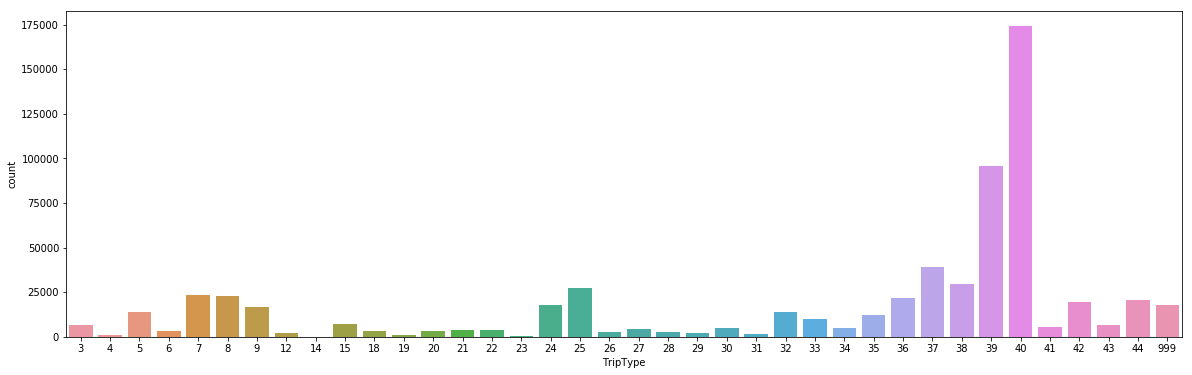

In [89]:
plt.figure(figsize=(20,6))
sns.countplot(data['TripType'])
plt.show()

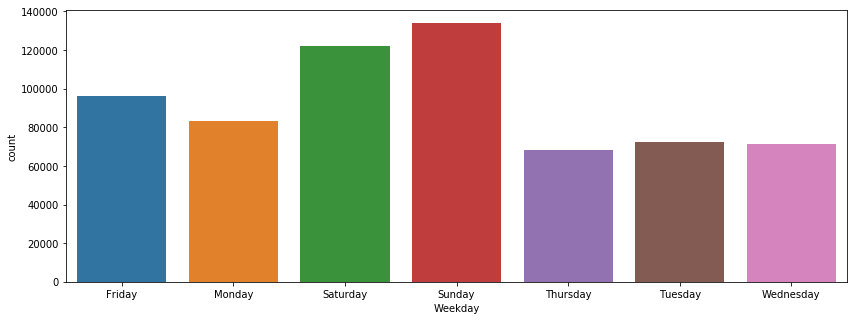

In [90]:
plt.figure(figsize=(14,5))
sns.countplot(data['Weekday'])
plt.show()

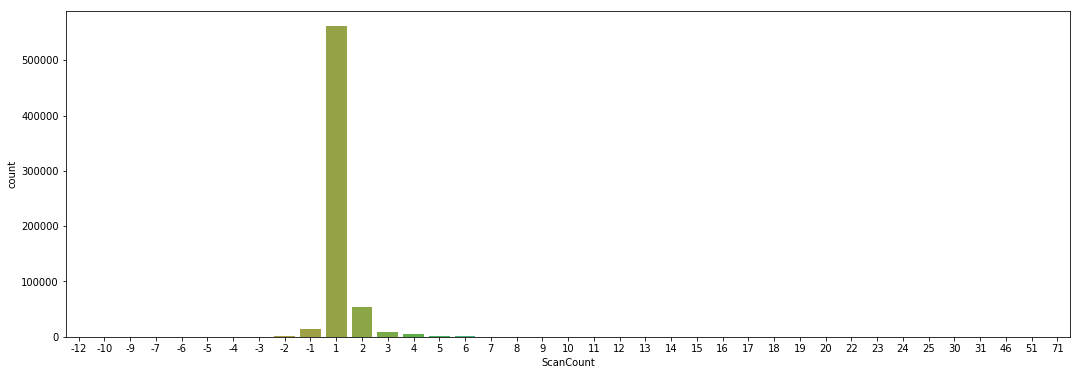

In [91]:
plt.figure(figsize=(18,6))
sns.countplot(data['ScanCount'])
plt.show()

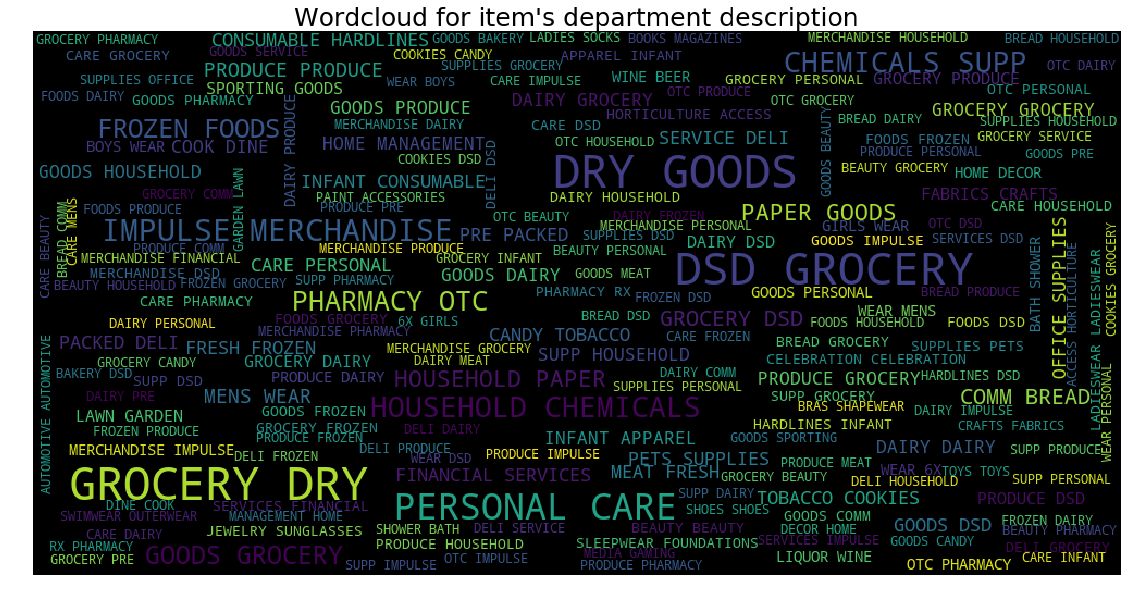

In [92]:
names = data["DepartmentDescription"][~pd.isnull(data["DepartmentDescription"])]
wordcloud = WordCloud(max_font_size=42, width=1000, height=500, font_step=1).generate(' '.join(names))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Wordcloud for item's department description", fontsize=25)
plt.axis("off")
plt.show()